### Import Libraries

In [21]:
import pandas as pd
import numpy as np
from scipy.stats import kstest, mannwhitneyu
import matplotlib.pyplot as plt

### Import Dataset

In [2]:
df = pd.read_excel("Exams_2019 (1).xlsx")
df.head()

,subject,School,Total,pl1,pk2,pv3,pr4,px5,Total_%,gender,municipality,urban,tips,language
0,LV9,Rīgas un visas Latvijas Metropolīta Aleksandra...,87.0,56.6667,63.3333,53.3333,60.0000,58.3333,58.0000,1,101,4,2,3
1,LV9,Rīgas un visas Latvijas Metropolīta Aleksandra...,104.0,70.0000,76.6667,63.3333,68.3333,70.0000,69.3333,2,101,4,2,3
2,LV9,Rīgas un visas Latvijas Metropolīta Aleksandra...,134.0,90.0000,90.0000,86.6667,90.0000,90.0000,89.3333,2,101,4,2,3
3,LV9,Rīgas un visas Latvijas Metropolīta Aleksandra...,65.0,33.3333,46.6667,36.6667,51.6667,50.0000,43.3333,1,101,4,2,3
4,LV9,Rīgas un visas Latvijas Metropolīta Aleksandra...,113.0,83.3333,83.3333,76.6667,81.6667,53.3333,75.3333,1,101,4,2,3


### Math Subject Marks by Primary School Boys

In [3]:
dfmpb = df[(df["subject"] == "MAT") & (df["gender"] == 1) & (df["tips"] == 2)]
dfmpb

,subject,School,Total,pl1,pk2,pv3,pr4,px5,Total_%,gender,municipality,urban,tips,language


### Math Subject Marks by High School Boys

In [4]:
dfmhb = df[(df["subject"] == "MAT") & (df["gender"] == 1) & (df["tips"] == 3)]
dfmhb.head()

,subject,School,Total,pl1,pk2,pv3,pr4,px5,Total_%,gender,municipality,urban,tips,language
30,MAT,Aglonas vidusskola,17.0,40.0,17.5,0.0000,NaN,NaN,21.250,1,101,4,3,1
34,MAT,Aglonas vidusskola,19.5,24.0,30.0,10.0000,NaN,NaN,24.375,1,101,4,3,1
42,MAT,Aglonas vidusskola,40.0,60.0,62.5,0.0000,NaN,NaN,50.000,1,101,4,3,1
46,MAT,Aglonas vidusskola,39.0,48.0,67.5,0.0000,NaN,NaN,48.750,1,101,4,3,1
59,MAT,Aglonas vidusskola,35.0,44.0,57.5,6.6667,NaN,NaN,43.750,1,101,4,3,1


**Descriptive Statistics of Math Subject Marks by High School Boys**

In [9]:
stats_boys = dfmhb["Total"].describe().to_frame()
stats_boys.loc["var"] = np.var(dfmhb["Total"])
stats_boys.round(2)

,Total
count,2646.00
mean,29.41
std,16.00
min,1.00
25%,17.00
50%,26.00
75%,39.50
max,80.00
var,255.92


### Math Subject Marks by Primary School Girls

In [10]:
dfmpg = df[(df["subject"] == "MAT") & (df["gender"] == 2) & (df["tips"] == 2)]
dfmpg

,subject,School,Total,pl1,pk2,pv3,pr4,px5,Total_%,gender,municipality,urban,tips,language


### Math Subject Marks by High School Girls

In [11]:
dfmhg = df[(df["subject"] == "MAT") & (df["gender"] == 2) & (df["tips"] == 3)]
dfmhg.head()

,subject,School,Total,pl1,pk2,pv3,pr4,px5,Total_%,gender,municipality,urban,tips,language
10,MAT,Aglonas vidusskola,52.0,76.0,67.5,40.0000,NaN,NaN,65.00,2,101,4,3,1
15,MAT,Aglonas vidusskola,52.0,80.0,77.5,6.6667,NaN,NaN,65.00,2,101,4,3,1
18,MAT,Aglonas vidusskola,37.0,40.0,67.5,0.0000,NaN,NaN,46.25,2,101,4,3,1
22,MAT,Aglonas vidusskola,44.0,52.0,75.0,6.6667,NaN,NaN,55.00,2,101,4,3,1
27,MAT,Aglonas vidusskola,42.0,40.0,80.0,0.0000,NaN,NaN,52.50,2,101,4,3,1


**Descriptive Statistics of Math Subject Marks by High School Girls**

In [13]:
stats_girls = dfmhg["Total"].describe().to_frame()
stats_girls.loc["var"] = np.var(dfmhg["Total"])
stats_girls.round(2)

,Total
count,3456.00
mean,28.96
std,14.80
min,1.00
25%,18.00
50%,26.00
75%,38.00
max,78.00
var,219.05


### Hypothesis: Does Distribution of Math Subject Marks by High School Boys fit to Normal Distribution?

In [15]:
ks, p = kstest(dfmhb["Total"], "norm")
print("p-value =", p)

if p > 0.05:
    print("Distribution of Math Subject Marks by High School Boys fit to Normal Distribution")
else:
    print("Distribution of Math Subject Marks by High School Boys does not fit to Normal Distribution")

p-value = 0.0
Distribution of Math Subject Marks by High School Boys does not fit to Normal Distribution


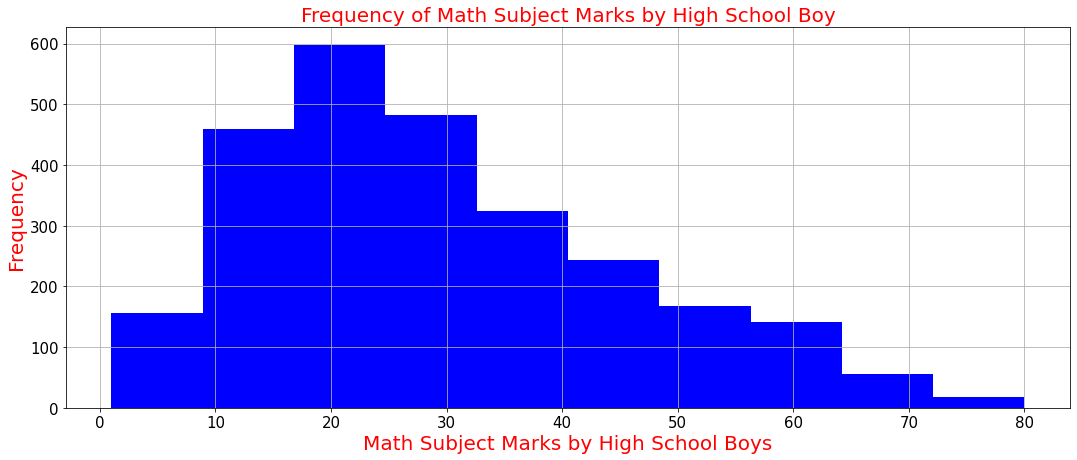

In [18]:
plt.figure(figsize = (18, 7))
dfmhb["Total"].hist(color = "blue")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Math Subject Marks by High School Boys", color = "red", size = 20)
plt.ylabel("Frequency", color = "red", size = 20)
plt.title("Frequency of Math Subject Marks by High School Boy", size = 20, color = "red")
plt.show()

### Hypothesis: Does Distribution of Math Subject Marks by High School Girls fit to Normal Distribution?

In [19]:
ks, p = kstest(dfmhg["Total"], "norm")
print("p-value =", p)
if p > 0.05:
    print("Distribution of Math Subject Marks by High School Girls fit to Normal Distribution")
else:
    print("Distribution of Math Subject Marks by High School Girls DOES NOT fit to Normal Distribution")

p-value = 0.0
Distribution of Math Subject Marks by High School Girls DOES NOT fit to Normal Distribution


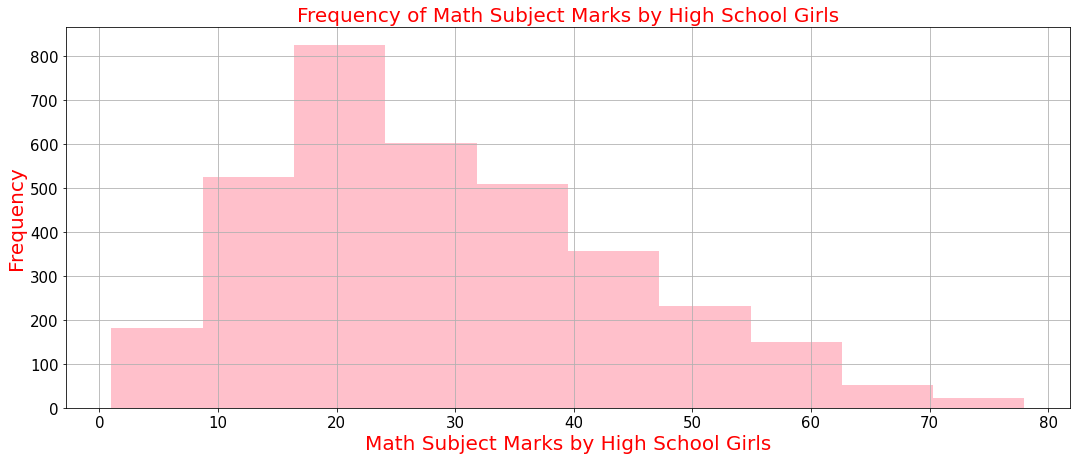

In [20]:
plt.figure(figsize = (18, 7))
dfmhg["Total"].hist(color = "pink")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Math Subject Marks by High School Girls", color = "red", size = 20)
plt.ylabel("Frequency", color = "red", size = 20)
plt.title("Frequency of Math Subject Marks by High School Girls", size = 20, color = "red")
plt.show()

### Hypothesis: Is the Mathematics Score of High School Boys and Girls are from different populations? (by Mann-Whitney U test)

In [26]:
ks, p = mannwhitneyu(dfmhb["Total"], dfmhg["Total"])
print("p-value", p, "\n")

if p > 0.05:
    print("Distribution of High School Boys and Girls Mathematics Marks is Same")
else:
    print("Distribution of High School Boys and Girls Mathematics Marks is Different")

p-value 0.48383970231973006 

Distribution of High School Boys and Girls Mathematics Marks is Same


**Note: We have no data for mathematics score of primary school girls and boys**